## Imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from pandasql import sqldf
from sklearn.preprocessing import LabelEncoder
# %load_ext autoreload
# %autoreload 2

## Read data

In [52]:
products_df = pd.read_parquet('data/products.parquet', engine='fastparquet')
reasons_df = pd.read_parquet('data/return_reasons.parquet', engine='fastparquet')
returns_df = pd.read_parquet('data/returns.parquet', engine='fastparquet')
reviews_df = pd.read_parquet('data/reviews.parquet', engine='fastparquet')

In [53]:
test_df = pd.read_parquet('data/test.parquet', engine='fastparquet')

In [57]:
reason_encoder = LabelEncoder()
returns_df['enc_cause'] = reason_encoder.fit_transform(returns_df.cause)

In [58]:
returns_df

,id,product_id,cause,comment,date_created,order_item_id,customer_id,purchase_price,enc_cause
index,,,,,,,,,
0,69138,6a1a7601fac958ee967c73fe19315db8f6cdc3f1cd8370...,DEFECTED,брак,2023-01-02 05:37:33.846,588140,b4465ede5691891836ccc432bb8c49e1537b1d0a74f721...,106000,1
1,69148,7cab221310edf5f3c75fc38259bcb7640d080b4b05d5bb...,PHOTO_MISMATCH,думала больше,2023-01-02 05:44:34.432,773695,9bf74458174dd9c039ee6317fd48b356e8fc146f23c60b...,23000,2
2,69154,728611508a21a9214f2c8cc076d21e30046ec5c59bf359...,DEFECTED,брак,2023-01-02 05:45:31.277,695067,0a185871d03ee346b71b657d3fbaebfc35823fec2861f7...,390000,1
3,69161,f4f4031321f9b7cf1175fc6d363769297334ddd76aa2eb...,WRONG_ITEM,не тот товар,2023-01-02 05:57:35.652,635687,1123ce2b71eb64c572e6de0e14a723c17a55f67748327d...,71000,3
4,69165,c8f3f349fa927aae5fc954c5268b578b9916a908bb1f8a...,DEFECTED,не включается и не работает,2023-01-02 05:59:34.447,764986,95cd02979c6f97dc58590f7c0e6c421d7c3db2b9e7212b...,84000,1
...,...,...,...,...,...,...,...,...,...
282136,3819180,cb2a6f0c33be71a1eaef8c241186acfa8c8fca10e7d2be...,WRONG_SIZE,-,2023-12-09 20:19:12.961,26433461,95cbd69dd069350aadfe5059bca87179984776de7ebf0a...,544000,4
282137,3819181,e7de53a7150ecc318207e36539b4dfec4f69722459cc12...,WRONG_SIZE,-,2023-12-09 20:19:12.962,26433464,95cbd69dd069350aadfe5059bca87179984776de7ebf0a...,199000,4
282138,3819447,12b1f9e8aae75148696978bb1f4455dd8cf25575e7977c...,WRONG_SIZE,-,2023-12-09 21:54:29.514,26550472,d636c9fa6a54da7dd768c2c11646ea69ebd9bd7e43ad19...,114000,4


## Distribution of return reasons

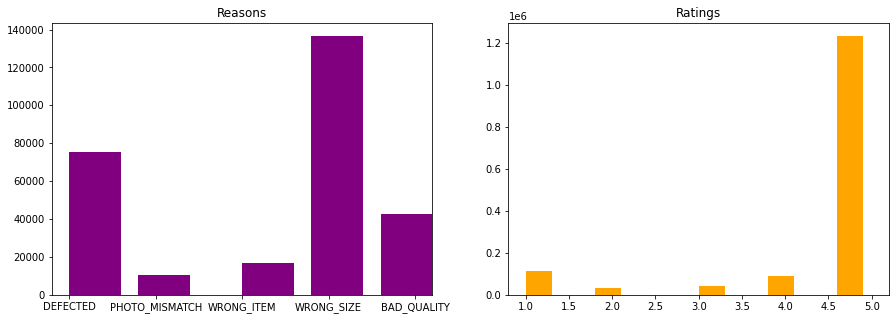

In [43]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.hist(returns_df.cause, width=0.6, color='purple');
ax.set_title('Reasons')
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Ratings')
plt.hist(reviews_df.rating, width=0.3, color='orange');

In [73]:
product_ratings = sqldf(
    '''
    SELECT product_id,
           avg(rating) as product_avg_rating
      FROM reviews_df
    GROUP BY product_id
    '''
)

In [70]:
train_df = sqldf(
    '''
    SELECT ret.id,
           ret.enc_cause as target,
           ret.purchase_price as price,
           cr.customer_avg_rating,
           pr.product_avg_rating
      FROM returns_df ret
      JOIN customers_ratings as cr 
        ON cr.customer_id = ret.customer_id
      JOIN product_ratings as pr 
        ON pr.product_id = ret.product_id
    '''
)

In [71]:
train_df

,id,target,price,customer_avg_rating,product_avg_rating
0,69154,1,390000,1.000000,4.035714
1,69161,3,71000,3.000000,1.000000
2,69165,1,84000,4.333333,4.666667
3,69324,4,18000,1.000000,4.620253
4,69403,4,15000,4.833333,1.000000
...,...,...,...,...,...
122754,3818368,1,649000,5.000000,4.300000
122755,3818407,4,50000,2.875000,4.000000
122756,3819180,4,544000,4.619048,5.000000
122757,3819181,4,199000,4.619048,5.000000


In [67]:
len(train_df)

122759